Analyzing the Breast Cancer dataset

In this tutorial, we will analyze the Breast Cancer dataset. The dataset is often used for classification tasks where the goal is to predict whether a tumor is malignant or benign.

First, we need to import the necessary libraries.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Load the Dataset

The Breast Cancer dataset is available in the sklearn.datasets module.

In [4]:
# Load the dataset
data = load_breast_cancer()

# Convert to a pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Display the first few rows of the dataset
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

Exploratory Data Analysis (EDA)

Let us perform some basic exploratory data analysis to understand the dataset.

In [6]:
# Check the shape of the dataset
print(df.shape)

(569, 31)


In [4]:
# Check for missing values
print(df.isnull().sum())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [7]:
# Summary statistics
print(df.describe())

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

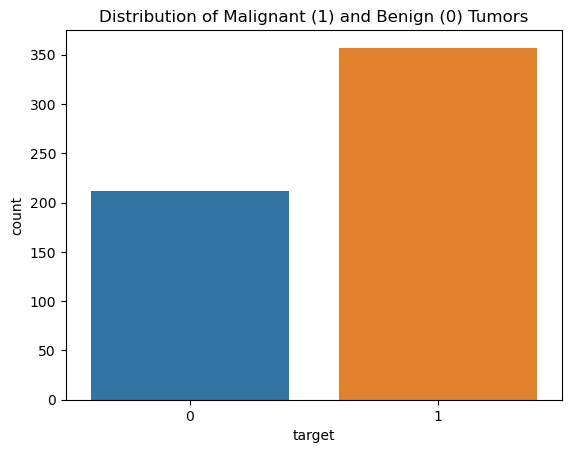

In [6]:
# Distribution of target variable
sns.countplot(x='target', data=df)
plt.title('Distribution of Malignant (1) and Benign (0) Tumors')
plt.show()

Data Preprocessing

Before building a model, we shall need to preprocess the data.

In [8]:
# Split the data into features and target
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Build and Train a Model

You can use a simple Random Forest classifier for this task.

In [9]:
# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Evaluate the Model

Evaluate the model's performance on the test set.

In [10]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[40  3]
 [ 1 70]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Accuracy Score:
0.9649122807017544


Confusion Matrix

True Negatives (TN): 40. The model correctly predicted 40 instances as benign (class 0).

False Positives (FP): 3. The model incorrectly predicted 3 instances as malignant (class 1) when they were actually benign.

False Negatives (FN): 1. The model incorrectly predicted 1 instance as benign (class 0) when it was actually malignant.

True Positives (TP): 70. The model correctly predicted 70 instances as malignant (class 1).

Classification Report

Metrics for Class 0 (Benign):
Precision: 0.98. Out of all instances predicted as benign, 98% were actually benign.
Recall: 0.93. Out of all actual benign instances, 93% were correctly predicted.
F1-Score: 0.95. The harmonic mean of precision and recall, indicating a good balance between the two.

Metrics for Class 1 (Malignant):
Precision: 0.96. Out of all instances predicted as malignant, 96% were actually malignant.
Recall: 0.99. Out of all actual malignant instances, 99% were correctly predicted.
F1-Score: 0.97. The harmonic mean of precision and recall, indicating a good balance between the two.

Overall Metrics:
Accuracy: 0.96 (96.49%). The model correctly predicted 96.49% of all instances.

Macro Avg: 0.97 (precision), 0.96 (recall), 0.96 (F1-score)
The average of the metrics for both classes, treating both classes equally.

Weighted Avg: 0.97 (precision), 0.96 (recall), 0.96 (F1-score)
The average of the metrics for both classes, weighted by the number of instances in each class.

Accuracy Score

Accuracy Score: 0.9649122807017544
The model achieved an overall accuracy of 96.49%, which is excellent for this dataset.
High Accuracy: The model performs very well, with an accuracy of 96.49%.
Low Misclassification: Only 4 instances were misclassified (3 false positives and 1 false negative).
Balanced Performance: The model performs well for both classes (benign and malignant), as indicated by the high precision, recall, and F1-scores for both classes.
Slight Bias Toward Class 1 (Malignant): The recall for class 1 (0.99) is slightly higher than for class 0 (0.93), meaning the model is slightly better at identifying malignant tumors than benign ones.

Feature Importance

You can also check the importance of each feature in the model.

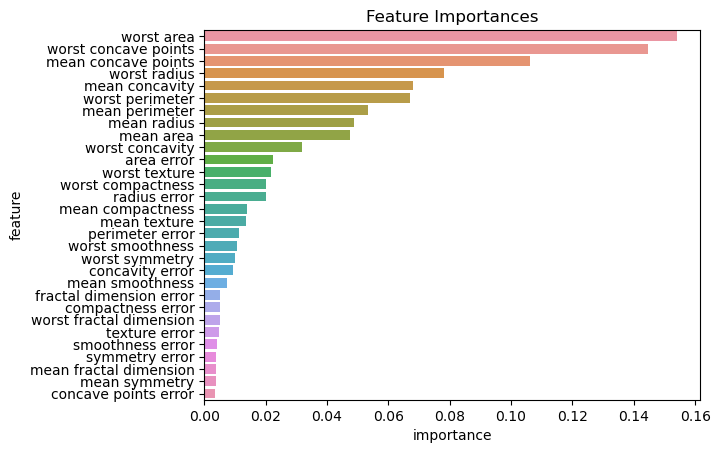

In [11]:
# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'feature': data.feature_names, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Plot feature importances
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()